# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
print(customers.shape)
customers.head()

(440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
customers.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [5]:
customers.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
customers['Total'] = customers['Fresh']+customers['Milk']+customers['Grocery']+customers['Frozen']+customers['Detergents_Paper']+customers['Delicassen']

In [7]:
analysis1 = customers.groupby("Region").agg({'Region': 'count', 'Total': 'sum'})

In [8]:
analysis1.sort_values(by='Total', ascending=False)

,Region,Total
Region,,
3,316,10677599
1,77,2386813
2,47,1555088


In [9]:
0.2 * 440

88.0

In [10]:
0.8 * customers.Total.sum()

11695600.0

In [11]:
customers.drop(columns=['Total'], inplace= True)

In [12]:
# Your observations here

# The Pareto principle doesn't apply here, because the 20% of the region is not responsible for
# the 80% of sales retail.

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [13]:
customers.corr(method ='pearson') #check correlation

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


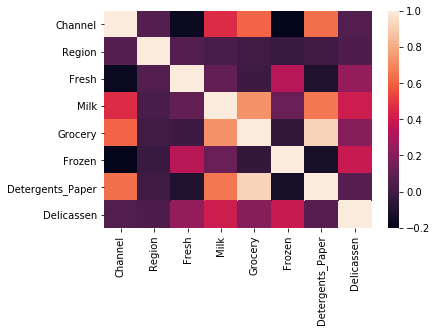

In [14]:
sns.heatmap(customers.corr())

In [15]:
# Your comment here:
# Grocery and Detergents_Paper are very correlated. 
# Let's drop the columns Detergent_paper

In [16]:
from scipy import stats
customers_clean = customers[(np.abs(stats.zscore(customers)) < 3).all(axis=1)] #remove outliners

In [17]:
customers_clean.drop(columns=['Detergents_Paper'], inplace= True)

/home/carolina/.local/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
customers_clean.shape

(414, 7)

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [19]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

scaler = StandardScaler()
customers_scale = scaler.fit_transform(customers_clean)

In [20]:
customers_scale

array([[ 1.47804445,  0.58772203,  0.19956882, ...,  0.11583669,
        -0.80184394,  0.08229138],
       [ 1.47804445,  0.58772203, -0.37265498, ...,  0.42707868,
        -0.27046195,  0.44251008],
       [ 1.47804445,  0.58772203, -0.44443787, ...,  0.13491131,
        -0.04973933,  5.43293721],
       ...,
       [ 1.47804445,  0.58772203,  0.38942639, ...,  3.63332091,
        -0.72529472,  0.51735004],
       [-0.67656964,  0.58772203, -0.04300432, ..., -0.71057515,
        -0.51898944,  0.72953365],
       [-0.67656964,  0.58772203, -0.80804266, ..., -0.66746341,
        -0.85299117, -0.97533705]])

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [21]:
# Your code here:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5)
labels = model.fit_predict(customers_scale)

In [22]:
customers_clean['labels'] = labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
customers_clean.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen,labels
0,2,3,12669,9656,7561,214,1338,2
1,2,3,7057,9810,9568,1762,1776,2
2,2,3,6353,8808,7684,2405,7844,4
3,1,3,13265,1196,4221,6404,1788,0
4,2,3,22615,5410,7198,3915,5185,4


Count the values in `labels`.

In [24]:
customers_clean['labels'].value_counts()

1    147
2    114
3     74
0     60
4     19
Name: labels, dtype: int64

In [25]:
analysis = pd.crosstab(customers_clean.Region,[customers_clean.labels])
analysis

labels,0,1,2,3,4
Region,,,,,
1,2,0,10,55,4
2,7,2,16,19,1
3,51,145,88,0,14


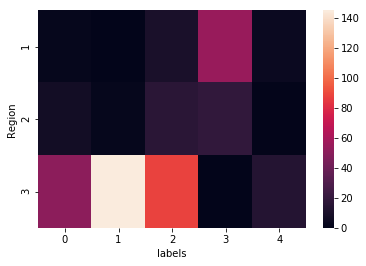

In [26]:
%matplotlib inline
sns.heatmap(analysis)

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [27]:
# Your code here
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.5).fit(customers_scale)
labels_ = clustering.labels_

In [28]:
customers_clean['labels_DBSCAN'] = labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Count the values in `labels_DBSCAN`.

In [39]:
customers_clean['labels_DBSCAN'].value_counts()

-1    331
 0     78
 1      5
Name: labels_DBSCAN, dtype: int64

In [40]:
customers_clean.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,1338,2,-1
1,2,3,7057,9810,9568,1762,1776,2,-1
2,2,3,6353,8808,7684,2405,7844,4,-1
3,1,3,13265,1196,4221,6404,1788,0,-1
4,2,3,22615,5410,7198,3915,5185,4,-1


# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

Text(0.5, 0, 'Grocery')

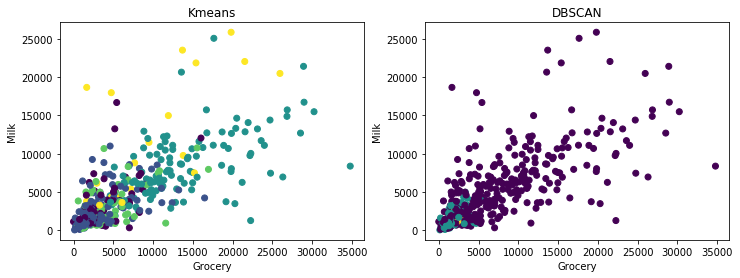

In [54]:
plt.figure(figsize=(12,4))

X = customers_clean.Grocery
y = customers_clean.Milk

plt.subplot(1,2,1)
plt.scatter(X,y,c = customers_clean.labels)
plt.title("Kmeans")
plt.ylabel("Milk")
plt.xlabel("Grocery")

plt.subplot(1,2,2)
plt.scatter(X,y,c = customers_clean.labels_DBSCAN)
plt.title("DBSCAN")
plt.ylabel("Milk")
plt.xlabel("Grocery")

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

Text(0.5, 0, 'Grocery')

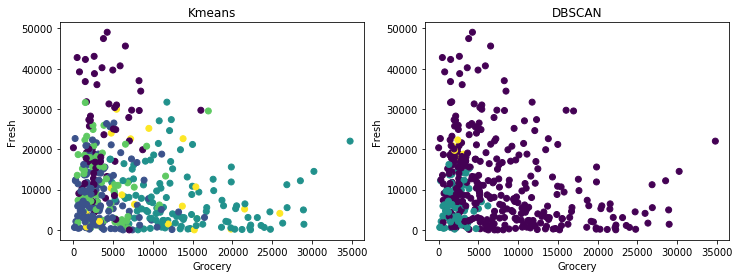

In [53]:
plt.figure(figsize=(12,4))

X = customers_clean.Grocery
y = customers_clean.Fresh

plt.subplot(1,2,1)
plt.scatter(X,y,c = customers_clean.labels)
plt.title("Kmeans")
plt.ylabel("Fresh")
plt.xlabel("Grocery")

plt.subplot(1,2,2)
plt.scatter(X,y,c = customers_clean.labels_DBSCAN)
plt.title("DBSCAN")
plt.ylabel("Fresh")
plt.xlabel("Grocery")

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

Text(0.5, 0, 'Frozen')

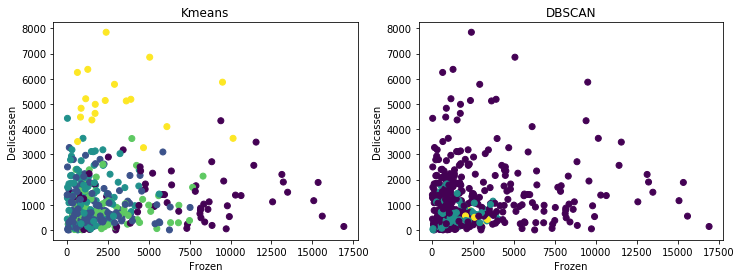

In [58]:
plt.figure(figsize=(12,4))

X = customers_clean.Frozen
y = customers_clean.Delicassen

plt.subplot(1,2,1)
plt.scatter(X,y,c = customers_clean.labels)
plt.title("Kmeans")
plt.ylabel("Delicassen")
plt.xlabel("Frozen")


plt.subplot(1,2,2)
plt.scatter(X,y,c = customers_clean.labels_DBSCAN)
plt.title("DBSCAN")
plt.ylabel("Delicassen")
plt.xlabel("Frozen")

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [61]:
Klabels_mean = customers_clean.groupby("labels").agg("mean")
Dlabels_mean = customers_clean.groupby("labels_DBSCAN").agg("mean")

In [64]:
print(Klabels_mean)

         Channel    Region         Fresh          Milk       Grocery  \
labels                                                                 
0       1.066667  2.816667  24120.483333   3529.483333   3857.266667   
1       1.006803  2.986395   7918.544218   2590.802721   3386.734694   
2       1.991228  2.684211   7534.517544   8611.359649  14142.008772   
3       1.054054  1.256757  10464.391892   2820.405405   3882.364865   
4       1.421053  2.526316  10005.947368  12313.315789  10118.105263   

             Frozen   Delicassen  labels_DBSCAN  
labels                                           
0       7098.083333  1327.883333      -1.000000  
1       1646.687075   822.823129      -0.401361  
2       1276.815789  1279.078947      -1.000000  
3       2444.986486   927.864865      -1.000000  
4       3222.315789  5126.421053      -1.000000  


In [65]:
print(Dlabels_mean)

                Channel    Region         Fresh         Milk      Grocery  \
labels_DBSCAN                                                               
-1             1.392749  2.435045  11636.450151  5661.202417  7978.770393   
 0             1.000000  3.000000   6197.884615  1727.551282  2156.884615   
 1             1.000000  3.000000  19913.600000  1673.600000  2360.800000   

                    Frozen   Delicassen    labels  
labels_DBSCAN                                      
-1             2814.178248  1400.903323  1.782477  
 0             1420.756410   594.525641  1.000000  
 1             2669.200000   487.000000  1.000000  


Which algorithm appears to perform better?

In [34]:
# Your observations here

# Kmean seems to perform better, because it separate the clusters in more groups. 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [35]:
# Your code here

In [36]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [37]:
# Your code here

In [38]:
# Your comment here